In [2]:
from src.segment import Segmenter
from src.synthetic_data import Point, Points, DistanceTransform 
from src.VMSI import *

2021-11-23 15:36:33,588 [INFO] WRITING LOG OUTPUT TO /Users/ruiyanghe/.cellpose/run.log


## Example with Synthetic Data

### Generate the data 

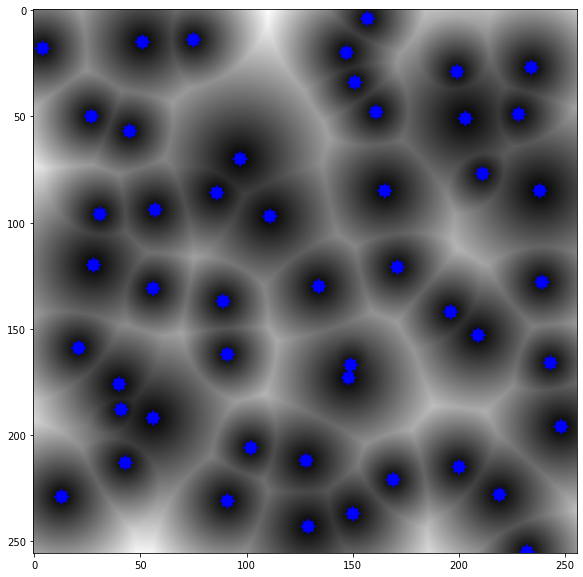

True

In [21]:
config = {
          'max_x' : 256,
          'max_y' : 256,
          'min_p' : 0.001,
          'max_p' : 0.004,
          'num_points' : 50
         }

generating_points = Points(**config)

dtr = DistanceTransform(generating_points)
dtr.compute_transform()
dtr.visualize_transform()

image = dtr.transform.copy()
image_8bit = (((image - image.min()) / (image.max() - image.min())) * 255.9).astype(np.uint8)
cv2.imwrite('Images/test_1.tif', image_8bit)

### Segment it

2021-11-23 15:39:12,316 [INFO] >>>> using CPU
Evaluating the neural network
2021-11-23 15:39:12,389 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2021-11-23 15:39:19,122 [INFO] estimated cell diameter(s) in 6.73 sec
2021-11-23 15:39:19,124 [INFO] >>> diameter(s) = 
2021-11-23 15:39:19,125 [INFO] [39.09, ]
2021-11-23 15:39:19,126 [INFO] ~~~ FINDING MASKS ~~~
2021-11-23 15:39:23,581 [INFO] >>>> TOTAL TIME 11.19 sec
Fixing the masks
Computing the vertices
Identifying the cells
Finding the borders between cells


100%|██████████| 118/118 [00:04<00:00, 25.44it/s]


Finding the cell barycenters
empty border for 12 22
empty border for 9 14
empty border for 8 13
empty border for 17 18
empty border for 43 47
empty border for 17 15


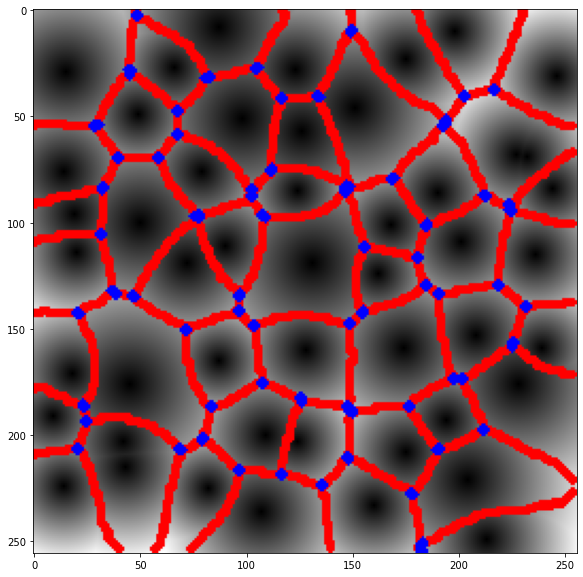

In [7]:
import importlib
import src.segment
importlib.reload(src.segment)
from src.segment import Segmenter

seg = Segmenter()
seg.segment(image.copy(), diameter=None, input_boundaries=False)
seg.visualize(name='masks', overlay=False)

### Infer the tensions

In [ ]:
# create the model 
model = VMSI(cell_pairs = seg.pairs(), edges = seg.edges(), num_cells = len(seg.cells[0]), 
             cells = seg.cells[0], barrycenters = seg.barrycenters[0], 
             edge_cells = seg.get_edge_cells(), height=256, width=256)

# fit the model parameters
q, z, p = model.fit()

# get the CAP tiling
CAP_tiling = model.CAP(image.copy(), q, z, p)

# view the CAP tiling
plt.figure(figsize=(15, 10))
plt.imshow(CAP_tiling)
plt.show()

# evaluate the model
evaluate(model, seg, dtr)

## Example with Real Data

### Load the Data

In [ ]:
image = cv2.resize(cv2.imread('Images/test.png.jpg', 0), (256, 256))

### Segment it

In [ ]:
seg = Segmenter() 
seg.segment(image, diameter=None) 
seg_img = seg.visualize('outlines', overlay=True, return_img=True)

### Infer the tensions

In [ ]:
# create the model 
model = VMSI(cell_pairs = seg.pairs(), edges = seg.edges(), num_cells = len(seg.cells[0]), 
             cells = seg.cells[0], barrycenters = seg.barrycenters[0], 
             edge_cells = seg.get_edge_cells(), height=256, width=256)

# fit the model parameters
q, z, p = model.fit()

# get the tiling
CAP_tiling model.CAP(np.float32(image.copy()), q, z, p)

# view the tension tiling
plt.figure(figsize=(15, 10))
plt.imshow(CAP_tiling)
plt.show()